<a href="https://colab.research.google.com/github/Nikolay1982Nikolaev/Bayes-Bicocca/blob/main/L8_ModTransizioni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Per un processo stocastico con spazio degli stati finito la proprieta di ricorrenza della catena di Markov permette di soddisfare le proprieta asintotiche utili per determinare la distribuzione di equlibrio

Nel caso in cui lo spazio degli stati e' illimitatamente continuo occore che la catena Markov soddisfi la **riccorenza secondo la definizione di Harris** in modo che la probabilita di visita di un certo sottoinsieme A infinite volte sia pari a uno.

Qando il processo raggiunge la distribuzione stazionaria, si dice che il processo e' per **sempre in equlibrio** o oscilla nel sottospazio definito dalla distriuzione marginale del processo.

La proprieta di RICIRENZA permette di definire delle restizioni in modo tale da essere certi che gli stati al limite possono essere visitati infinite volte

La stazionarieta permette di assegnare una componente costante alla struttura probabilistica della catena definisce le posizione del processo, ed assicura che la struttura probabilistica rimanga costante

Il periodo della catena e' la lungheza di tempo che il proceso richiede per ripetere lo stesso ciclo di realizzazioni

Una catena di Marakov e' ERGODICA quando il tempo medio di visita di uno stato e' uguale alla probabilita di quello stato rispetto ad una densita di interesse

La proprieta di ergodicita asicura che se la catena ha raggiunto lo stato ergodico i valori campionati possono essere considerati delle determinazioni della distribuzione di interesse.

Se e' possibile costruire una catena di Markov con queste caratteristiche  allora la catena avra un unica distribuzione limite che e' la distribuzione di equlibrio ovvero proprio la densita a posteriori che interessa simulare

Gli algoritmi che veranno introdotti denominati MH e Gibs sample permettono di avere un kernel di transizione che ammette uan distribuzione sstazionaria $p(\theta|x)$

La technica risultante dall'utilizzo di un processo stocastico Markoviano e' definita MCMC e prevede si campionamento da una catena di Markov che ha una distribuzione stazionaria che coincide con la densita da integrare



## Passeggiata casuale

Un processo stocastico e' PC quando il valore assunto dal processo al passo n si pu esprimere:
$$X_n = X_{n-1}+ W_n$$

$W_n$ variabile casuale d Bernoulli con probabilita p e a valori $\pm 1$

si nota che si tratta di un proceso Markoviano in quanto lo stato del proceso al tempo t dipende dallo stato al tempo t-1

Questo speciale processo si caratterizza per il fatto che esiste solo la probabilita di pasaaggio da uno stato a qualle immediatamente adiacente; p e' la probabilita di movimento verso una direzione e 1-p e' quella verso la direzione opposta

esempio
$$P(X_n=j|X_{n-1}=j+1)= p$$
$$P(X_n= j|X_{n-1}=j-1) 1-p$$

Fissando uno stato iniziale o di partenza $X_0$ della passegiata il processo si scrive anche nel seguente modo

$$X_n= X_0 + \sum_{i=1}^{n-1} W_i$$

La matrice di transizione di questo particolare proceso stocastico ha elementi pairi a 0 (non e' persistente) nella diagonale principale ad eccezzione dei stati assorbenti (stati terminali del processo) in quanto non e' mai possibile rimanere nello stesso stato se non quando il processo arriva nello stato terminale

Nell'esempio che segue si considera un processo con 6 stati. Il vettore che definisce le probabilita iniziale della catena e' $$\pi= (0 0 0 1 0 0 )$$
 in pratica all'inizio della passaggiata il processo si trova nello stato 4



## Modello di transizione - Markov Chain Transitional model

Utilizza le proprieta del processo esposto nel contesto dei dati longitudinali

I dati lingitudinali sono relativi ad osservazioni ripetute sulla stessa unita statistica in piu isntati temporanei e riguardano un'insioeme di unita statistiche

Nel contempo presentano una struttura più complessa rispetto ad
altre tipologie di dati, ad esempio, un’indagine statistica (survey)
pianificata su più tempi presenta delle caratteristiche peculiari che
riguardano

le unità (individui), il periodo temporale (tempi, le rispettive
frequenze) e le variabili di interesse (risposta e covariate) che
possono variare nel tempo

Inoltre non sempre le rilevazioni risultano disponibili per tutti i
periodi temporali per ogni unità e questo comporta dei valori
mancanti che devono essere trattati in modo opportuno

Le seguente variabili $Y^{(1)}...Y^{(T)}$ sono le variabili risposta che rappresentano un processo stocastico Markoviano

Ogni Y ha c categorie dette anche categorie di risposta: c=0...c-1

In base alle proprietà esposte in precedenza il modello grafico (detto
anche grafo direzionato aciclico) è formato da archi che uniscono
solo i nodi (le variabili) immediatamente seguenti in senso temporale


Path diagram:

$$Y^{(1)}--> Y^{(2)}--> ...--> Y^{(T)}$$






La distribuzione congiunta delle risposte rispetto alle ipotesi di
Markovianità del primo ordine ed omogeneità della catena si ricava a
partire da un vettore di realizzazioni $y=y_1...y_n$

$$f(y)= \pi_{y^{(1)}}\Pi_{y^{(t)}|y^{(t-1)}}$$

- $\pi_{y^{(1)}}$ sono le probabilita inziali di ogni stato (categoria)
-  $\Pi_{y^{(t)}|y^{(t-1)}}$ e' la matrice di transizone tra gli stati della catena

Nel seguoto le probabilita inizlia: $\pi_{y^{(1)}}= \pi_y$
- prob di transizione $\Pi_{y^{(t)}|y^{(t-1)}} = \pi_{y|\bar{y}}$

I parametri nel modello di transizione sono pertanto relativi alle
probabilità di ogni stato nel periodo iniziale e di transizione tra stati
nei periodi successivi

I vincoli imposti su tali parametri sono che la somma delle
probabilità iniziali sia pari a 1 e che la matrice di transizione sia una
matrice stocastica

Il modello presenta un numero di parametri liberi ( np, degrees of
freedom) pari alla seguente somma che coinvolge il numero di
categorie della variabile risposta c

$$np = c-1 + c(c-1)$$


Disponendo di un campione con n unità e considerando le
configurazioni di risposta osservate y (dette pattern di risposta) e le rispettive frequenze $n_y$ la funzione di log-verosim si puo scrivere:
$$l(\theta)= \sum_{y} n_y log(f(y))$$

- $\theta$ - il vettore dei parametri che raccoglie tutti quelli del modelo


La verosimiglianza precedente si puo scrivere come somma che
coinvolge i rispettivi parametri nel modo seguente

$$l(\theta)= \sum_{y=0}^{c-1}a_y^{(1)} log \pi_y + \sum_{\bar{y}}^{c-1} \sum_{y=0}^{c-1} a_{\bar{y}y} log(\pi_{y|\bar{y}})$$

- $a_y^{(1)}$ - indica il numero di unita che presentano la modalita y nel periodo iniziale

- $a_{\bar{y}y}$ si indica il numero di unita che presentano la modalita $\bar{y}$ al tempo t-1 e y al tempo t pertanto che transitano da uno stato ad un altro nel tempo

Le soluzioni per l’equazione precedente sono le seguenti
$$\hat{\pi_y}= \frac{a_y^{(1)}}{n}$$

$$\hat{\pi}_{y|\bar{y}}= \frac{a_{\bar{y}y}}{a_{\bar{y}}}$$

- $\bar{y}, y = 0,....c-1$ sono le stime di massima verosimiglianza
dei parametri del modello.

La precisione delle stime si determina impiegando gli errori standard
che si utilizzano sia per la verifica delle ipotesi sia per la
determinazione degli intervalli di confidenza




Gli errori standard si ottengono:
- sia imiegando la radice quadrata degli elementi suladiagonale dell'inversa della matrice di informazione e utilizzando il metodo asintotico
- oppure dalla matrice d'informazione attesa
- oppure impiegato il bootstrap

In [ ]:
load("/content/drive/MyDrive/00.Last_sprint_UNIVERSITA/02.Bayes/datalong.Rdata")

In [ ]:
head(datalong)

,id,time,X1
,<int>,<int>,<dbl>
1,1,1,1
2,2,1,0
3,3,1,0
4,4,1,1
5,5,1,0
6,6,1,1


In [ ]:
library(dplyr)

# ordinare per colonna
dat <- datalong[order(datalong$id),]
head(dat)


,id,time,X1
,<int>,<int>,<dbl>
1,1,1,1
1001,1,2,0
2001,1,3,2
3001,1,4,0
2,2,1,0
1002,2,2,2


In [ ]:
install.packages("LMest")
library(LMest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘lpSolve’, ‘limSolve’, ‘shape’, ‘MultiLCIRT’, ‘mvtnorm’, ‘Formula’, ‘mix’, ‘diagram’, ‘mclust’, ‘scatterplot3d’


Package 'LMest' version 3.1.2



In [ ]:
dt <- lmestData(data = datalong,
          id = "id",
          time = "time")
summary(dt, varType = rep("d",ncol(dt$Y)))



Data Info:
---------- 

Observations:        1000 
Time occasions:      4 
Variables:           1 


Proportion:
---------- 

 time     dt       
 1:1000   0:0.3165 
 2:1000   1:0.18225
 3:1000   2:0.50125
 4:1000            

Proportion by year:
---------- 


Time =  1 

 time     dt     
 1:1000   0:0.511
          1:0.3  
          2:0.189

Time =  2 

 time     dt     
 2:1000   0:0.247
          1:0.069
          2:0.684

Time =  3 

 time     dt     
 3:1000   0:0.275
          1:0.065
          2:0.66 

Time =  4 

 time     dt     
 4:1000   0:0.233
          1:0.295
          2:0.472


In [ ]:
# Stimiamo il modello di transizione con la funzione lmestMc
out3 <- lmestMc(responsesFormula = X1 ~ NULL,
                index = c("id", "time"),
                data = datalong,
                modBasic = 1)


# sintesi delle stime
print(out3)


Basic Markov chain model
Call:
lmestMc(responsesFormula = X1 ~ NULL, data = datalong, index = c("id", 
    "time"), modBasic = 1)

Available objects:
 [1] "lk"       "piv"      "Pi"       "np"       "aic"      "bic"     
 [7] "Fy"       "n"        "TT"       "modBasic" "call"     "data"    

Convergence info:
     LogLik np      AIC      BIC    n TT
  -3694.146  8 7404.292 7443.554 1000  4


In [ ]:
summary(out3)

Call:
lmestMc(responsesFormula = X1 ~ NULL, data = datalong, index = c("id", 
    "time"), modBasic = 1)

Coefficients:

Initial probabilities:
  est_piv
0   0.511
1   0.300
2   0.189

Transition probabilities:
        category
category      0      1      2
       0 0.1123 0.1152 0.7725
       1 0.2834 0.1429 0.5737
       2 0.3366 0.1618 0.5016


In [ ]:
# Stima degli errori standard
out3 <- lmestMc(responsesFormula = X1 ~ NULL,
                index = c("id", "time"),
                data = datalong,
                modBasic = 1, out_se = T)
summary(out3)


Pi4 <- out3$Pi[,,4]; Pi4

Call:
lmestMc(responsesFormula = X1 ~ NULL, data = datalong, index = c("id", 
    "time"), modBasic = 1, out_se = T)

Coefficients:

Initial probabilities:
  est_piv
0   0.511
1   0.300
2   0.189

Standard errors for the initial probabilities:
  se_piv
0 0.0158
1 0.0145
2 0.0124

Transition probabilities:
        category
category      0      1      2
       0 0.1123 0.1152 0.7725
       1 0.2834 0.1429 0.5737
       2 0.3366 0.1618 0.5016

Standard errors for the transition probabilities:
        category
category      0      1      2
       0 0.0098 0.0099 0.0130
       1 0.0216 0.0168 0.0237
       2 0.0121 0.0094 0.0128


,0,1,2
0,0.1122943,0.1151985,0.7725073
1,0.2834101,0.1428571,0.5737327
2,0.3365949,0.1617743,0.5016308


In [ ]:
# Intervallo di confidenza la livello del 95%
Pi4[3,3]+c(-1,1)*qnorm(0.975)*0.0128


[1] 0.4765433 0.5267183

## Stima del modello eterogeneo

In [ ]:
out3h <- lmestMc(responsesFormula = X1 ~ NULL,
                index = c("id", "time"),
                data = datalong,
                modBasic = 0, out_se = T)
print(out3h)


summary(out3h)



Basic Markov chain model
Call:
lmestMc(responsesFormula = X1 ~ NULL, data = datalong, index = c("id", 
    "time"), modBasic = 0, out_se = T)

Available objects:
 [1] "lk"       "piv"      "Pi"       "np"       "aic"      "bic"     
 [7] "Fy"       "n"        "TT"       "modBasic" "sepiv"    "sePi"    
[13] "call"     "data"    

Convergence info:
     LogLik np      AIC      BIC    n TT
  -3505.423 20 7050.847 7149.002 1000  4
Call:
lmestMc(responsesFormula = X1 ~ NULL, data = datalong, index = c("id", 
    "time"), modBasic = 0, out_se = T)

Coefficients:

Initial probabilities:
  est_piv
0   0.511
1   0.300
2   0.189

Standard errors for the initial probabilities:
  se_piv
0 0.0158
1 0.0145
2 0.0124

Transition probabilities:
, , time = 2

        category
category      0      1      2
       0 0.1252 0.0294 0.8454
       1 0.3700 0.1033 0.5267
       2 0.3810 0.1217 0.4974

, , time = 3

        category
category      0      1      2
       0 0.0648 0.0202 0.9150
       1 0.0725 0

## Stime delle probabilità marginali

In [17]:
Fy <- out3h$Fy
Fy

,0,1,2
1,0.511,0.300,0.189
2,0.247,0.069,0.684
3,0.275,0.065,0.660
4,0.233,0.295,0.472


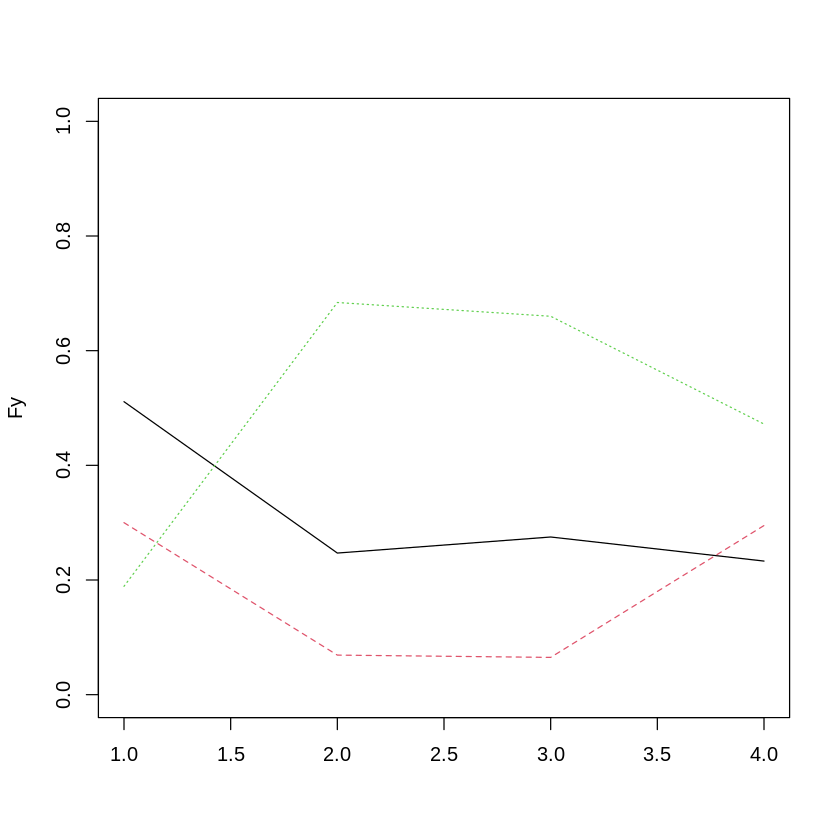

In [18]:
# Traietorie
matplot(Fy, type = "l",
        ylim = c(0,1))


In [20]:
#$ Matrice di transizione
pi2 <- round(out3h$Pi[,,2],2);
pi2


,0,1,2
0,0.13,0.03,0.85
1,0.37,0.10,0.53
2,0.38,0.12,0.50


In [22]:
out3h$Pi

, , time = 1

        category
category 0 1 2
       0 0 0 0
       1 0 0 0
       2 0 0 0

, , time = 2

        category
category         0          1         2
       0 0.1252446 0.02935421 0.8454012
       1 0.3700000 0.10333333 0.5266667
       2 0.3809524 0.12169312 0.4973545

, , time = 3

        category
category          0          1         2
       0 0.06477733 0.02024291 0.9149798
       1 0.07246377 0.01449275 0.9130435
       2 0.37134503 0.08625731 0.5423977

, , time = 4

        category
category         0         1         2
       0 0.1309091 0.3600000 0.5090909
       1 0.1076923 0.4615385 0.4307692
       2 0.2878788 0.2515152 0.4606061

In [24]:
pi3 <- round(out3h$Pi[,,3],2);
pi3

,0,1,2
0,0.06,0.02,0.91
1,0.07,0.01,0.91
2,0.37,0.09,0.54


In [25]:
pi4 <- round(out3h$Pi[,,4],2);
pi4

,0,1,2
0,0.13,0.36,0.51
1,0.11,0.46,0.43
2,0.29,0.25,0.46


Loading required package: shape



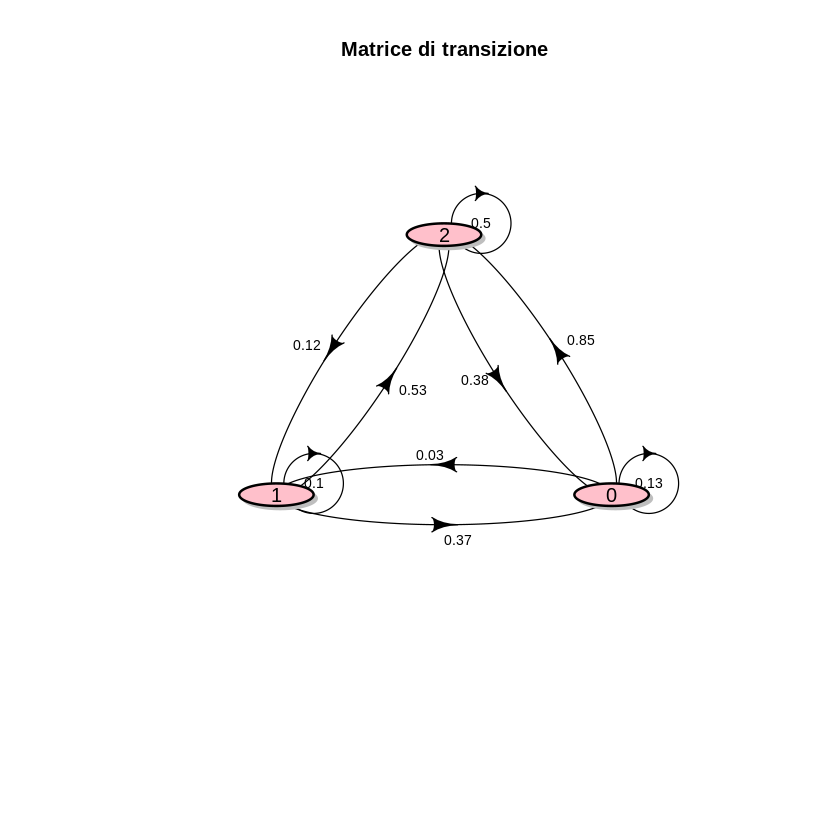

In [26]:
library(diagram)
## Loading required package: shape
plotmat(t(pi2),
        lwd = 1,
        box.lwd = 2,
        box.col =  "pink",
        relsize = 0.7,
        self.cex = 0.8,
        cex.txt = 0.7,
        box.size = 0.1,
        box.prop = 0.3,
        main = "Matrice di transizione")


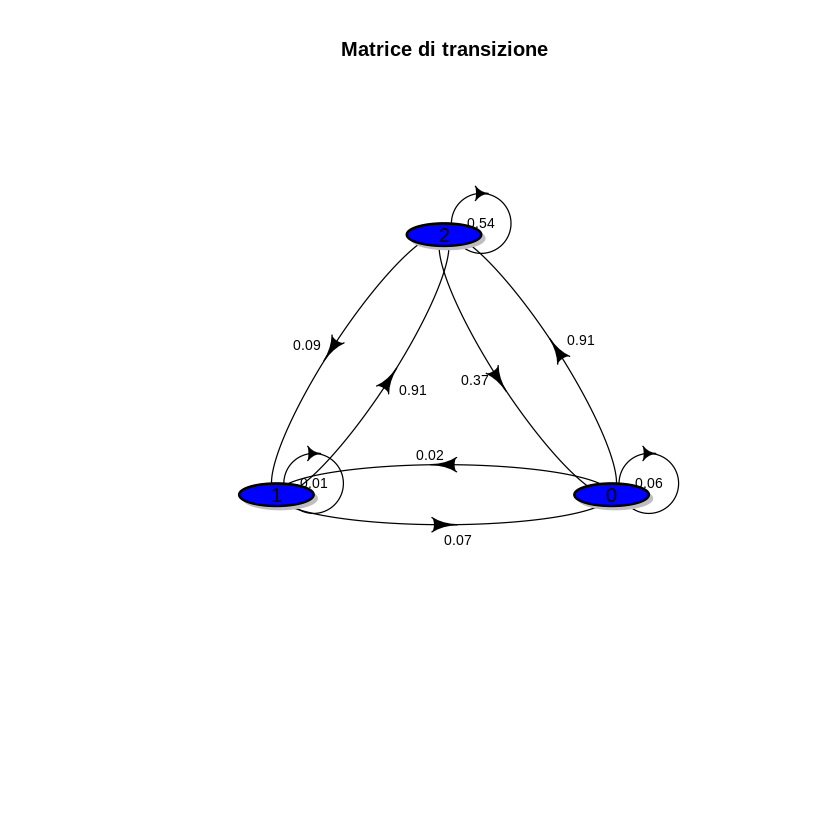

In [28]:
plotmat(t(pi3),
        lwd = 1,
        box.lwd = 2,
        box.col =  "blue",
        relsize = 0.7,
        self.cex = 0.8,
        cex.txt = 0.7,
        box.size = 0.1,
        box.prop = 0.3,
        main = "Matrice di transizione")


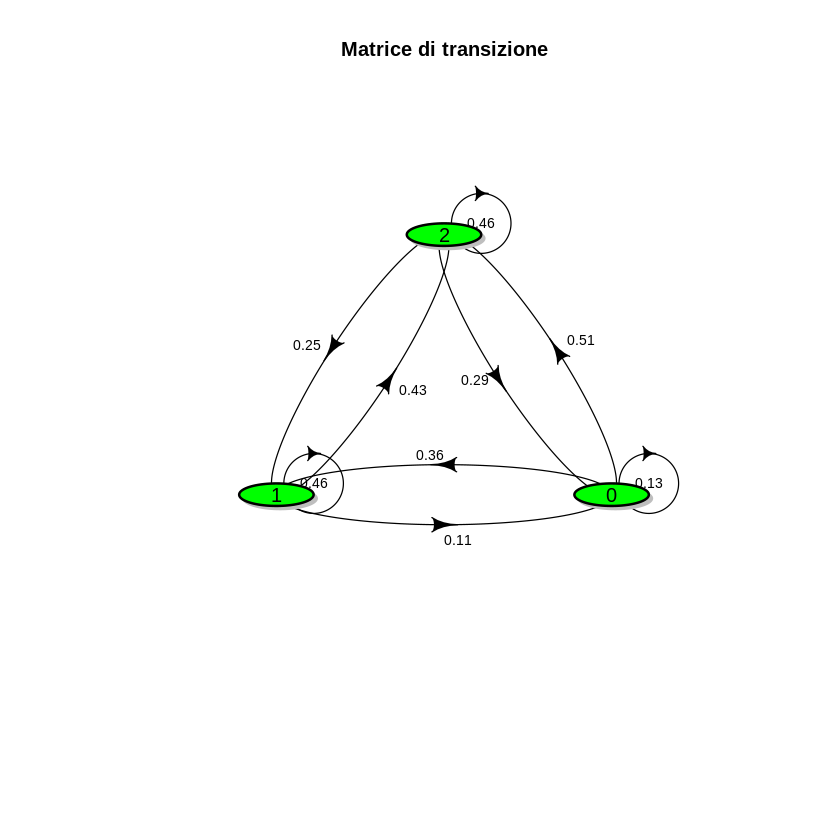

In [29]:
plotmat(t(pi4),
        lwd = 1,
        box.lwd = 2,
        box.col =  "green",
        relsize = 0.7,
        self.cex = 0.8,
        cex.txt = 0.7,
        box.size = 0.1,
        box.prop = 0.3,
        main = "Matrice di transizione")


## Modello Hidden Markov


In [43]:
require(LMest)
data("RLMSlong")
data("RLMSdat")


In [44]:
new.levels <- c(4,3,2,1,0)

RLMSlong$value <- new.levels[RLMSlong$value]






In [45]:
dt <- lmestData(data=RLMSlong,
                id = "id",
                time = "time",
                responsesFormula = value ~ NULL)

In [46]:
summary(dt, dataSummary = "responses",
        varType = rep("d",ncol(dt$Y)))


Data Info:
---------- 

Observations:        1718 
Time occasions:      7 
Variables:           1 


Proportion:
---------- 

 time     value      
 1:1718   0:0.0251954
 2:1718   1:0.0975387
 3:1718   2:0.205222 
 4:1718   3:0.5415766
 5:1718   4:0.1304673
 6:1718              
 7:1718              

Proportion by year:
---------- 


Time =  1 

 time     value      
 1:1718   0:0.0343423
          1:0.1263097
          2:0.1763679
          3:0.5261932
          4:0.136787 

Time =  2 

 time     value      
 2:1718   0:0.032014 
          1:0.1006985
          2:0.2008149
          3:0.5349243
          4:0.1315483

Time =  3 

 time     value      
 3:1718   0:0.0273574
          1:0.1117579
          2:0.1973225
          3:0.5064028
          4:0.1571595

Time =  4 

 time     value      
 4:1718   0:0.024447 
          1:0.1036088
          2:0.201979 
          3:0.5681024
          4:0.1018626

Time =  5 

 time     value      
 5:1718   0:0.0256112
          1:0.080326 
    